In [149]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE


In [150]:
#1. 데이터 구성하기(1)
df_raw = pd.read_csv("../data/Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [151]:
#1. 데이터 구성하기(2) - 결측치 확인
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [152]:
#1. 데이터 구성하기(3)
df_raw['diagnosis'].replace({'음성':0, '양성': 1}, inplace=True)

df_raw_x = df_raw.drop("diagnosis",axis=1)
df_raw_y = df_raw["diagnosis"]

In [153]:
#1. 데이터 구성하기(4) - 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)

print("train data size: {}".format(df_train_x.shape))
print("test data size: {}".format(df_test_x.shape))

train data size: (192, 30)
test data size: (128, 30)


In [154]:
#2. Over-Sampling: SMOTE(1) - 목표변수 빈도 확인

print(df_raw.value_counts(["diagnosis"], "\n"))
print("diagnosis=1 비율 ", df_raw.value_counts(df_raw["diagnosis"]==1)/len(df_raw))

diagnosis
0            0.6625
1            0.3375
dtype: float64
diagnosis=1 비율  diagnosis
False    0.6625
True     0.3375
dtype: float64


## diagnosis가 음성과 양성인 데이터의 비율이 서로 동일하지 않다는 것을 확인했다. 따라서 over-sampling을 통해 두 그룹의 데이터 개수를 맞춰주도록 한다. 

In [155]:
#2. Over-Sampling: SMOTE(2)

sm = SMOTE(sampling_strategy='auto')

x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)

print("Over-sampling 전:\n", df_train_y.value_counts(),"\n")
print("Over-sampling 후 Train X:\n", x_resampled.shape)
print("Over-sampling 전 Train Y:\n", y_resampled.shape,"\n")
print("Over-sampling 후 '1':\n", sum((y_resampled==1)))
print("Over-sampling 후 '0':\n", sum((y_resampled==0)),"\n")

Over-sampling 전:
 0    115
1     77
Name: diagnosis, dtype: int64 

Over-sampling 후 Train X:
 (230, 30)
Over-sampling 전 Train Y:
 (230,) 

Over-sampling 후 '1':
 115
Over-sampling 후 '0':
 115 



In [156]:
#2. Over-Sampling: SMOTE(3) - 데이터 결합

df_resampled = pd.concat([x_resampled, y_resampled], axis=1)
print(df_resampled.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0       13.150         15.34           85.31      538.9          0.09384   
1       15.750         19.22          107.10      758.6          0.12430   
2       20.640         17.35          134.80     1335.0          0.09446   
3       15.710         13.93          102.00      761.7          0.09462   
4        9.667         18.49           61.49      289.1          0.08946   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.08498         0.09293              0.03483         0.1822   
1           0.23640         0.29140              0.12420         0.2375   
2           0.10760         0.15270              0.08941         0.1571   
3           0.09462         0.07135              0.05933         0.1816   
4           0.06258         0.02948              0.01514         0.2238   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0             

# 과제 1. 의사결정나무_분류

In [135]:
#1. 모델 생성(1) - 기본: 원본 데이터 사용

tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.883


In [136]:
#1. 모델 생성(1) - 기본: over-sampling된 데이터 사용

tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(x_resampled, y_resampled)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(x_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.906


## 기본 옵션으로 원본 데이터를 활용한 모델과 over-sampling된 데이터를 활용한 모델을 생성해보았다. 

## 두 개의 모델 모두 train score가 100%로 train 데이터에 과대적합되어 있다는 것을 볼 수 있다. 따라서 파라미터 조정을 통해 general 모델을 만들어 본다.

## 그리고 전자보다 후자의 경우, test score가 높았기에 파라미터 조정에서 사용할 데이터들은 over-sampling data이다.(x_resampled, y_resampled)

In [137]:
#1. 모델 생성(2) - max_depth 조정

test_accuracy = []
train_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=v_max_depth)
    tree.fit(x_resampled, y_resampled)
    train_accuracy.append(tree.score(x_resampled, y_resampled))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
#결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainAccuracy'] = train_accuracy
df_score_depth['TestAccuracy'] = test_accuracy

#모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.935,0.852
1,2,0.978,0.906
2,3,0.996,0.906
3,4,1.000,0.906
4,5,1.000,0.906
5,6,1.000,0.906
6,7,1.000,0.906
7,8,1.000,0.906
8,9,1.000,0.906
9,10,1.000,0.906


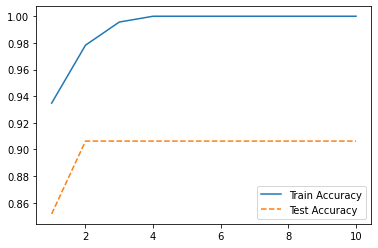

In [138]:
plt.plot(para_depth, train_accuracy, linestyle='-', label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle='--', label="Test Accuracy")
plt.legend()

## train과 test 데이터의 성능 변화를 고려해 max_depth를 4로 설정한다.

In [139]:
#1. 모델 생성(3) - min_samples_split 조정
train_score = []
test_score = []

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_split=v_min_samples_split)
    tree.fit(x_resampled, y_resampled)
    train_score.append(tree.score(x_resampled, y_resampled))
    test_score.append(tree.score(df_test_x, df_test_y))
    
#결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

#모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,10,0.996,0.906
1,20,0.991,0.914
2,30,0.991,0.914
3,40,0.991,0.914
4,50,0.991,0.914
5,60,0.991,0.914
6,70,0.991,0.914
7,80,0.991,0.914
8,90,0.991,0.914
9,100,0.991,0.914


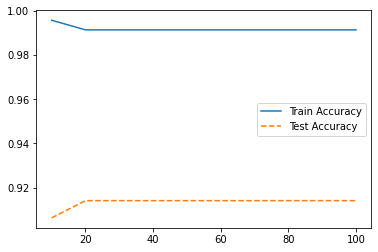

In [140]:
plt.plot(para_split, train_score, linestyle='-', label="Train Accuracy")
plt.plot(para_split, test_score, linestyle='--', label="Test Accuracy")
plt.legend()

## train과 test 데이터의 성능 변화가 거의 없으나 분리 노드의 최소 자료 수를 60으로 설정한다.

In [141]:
#1. 모델 생성(4) - min_samples_leaf 조정
train_score = []
test_score = []

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_split=60, \
                                 min_samples_leaf=v_min_samples_leaf)
    tree.fit(x_resampled, y_resampled)
    train_score.append(tree.score(x_resampled, y_resampled))
    test_score.append(tree.score(df_test_x, df_test_y))
    
#결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.983,0.914
1,4,0.974,0.922
2,6,0.974,0.906
3,8,0.974,0.906
4,10,0.974,0.906
5,12,0.974,0.906
6,14,0.970,0.922
7,16,0.961,0.922
8,18,0.961,0.922
9,20,0.952,0.922


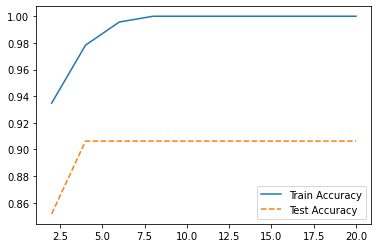

In [142]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle='--', label="Test Accuracy")
plt.legend()

## train과 test 데이터의 성능 변화를 고려해 잎사귀 노드의 최소 자료 수를 8로 설정한다.

In [143]:
#2. 최종 모델 선정
tree_final = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_split=60, \
                                 min_samples_leaf=8)
tree_final.fit(x_resampled, y_resampled)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=60,
                       random_state=1234)

In [144]:
#3. 최종 모델 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.906
Confusion Matrix: 
[[90  7]
 [ 5 26]]
              precision    recall  f1-score   support

           0      0.947     0.928     0.937        97
           1      0.788     0.839     0.812        31

    accuracy                          0.906       128
   macro avg      0.868     0.883     0.875       128
weighted avg      0.909     0.906     0.907       128



## 결론: 의사결정나무 모델의 accuracy는 약 90.6이다. precision과 f1-score의 값의 큰 차이는 없으나 diagnosis가 양성인 경우 f1-score가 1에 가깝다고 보기는 어렵다. 따라서 유방암을 진단하는 데 있어 좋은 모델이라고 보기는 어려운 것 같다.

# 과제 2. 랜덤 포레스트_분류

In [157]:
#1. 모델 생성(1) - 기본: 원본 데이터 사용

rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.922


In [158]:
#1. 모델 생성(1) - 기본: over-sampling된 데이터 사용

rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(x_resampled, y_resampled)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(x_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.938


## 기본 옵션으로 원본 데이터를 활용한 모델과 over-sampling된 데이터를 활용한 모델을 생성해보았다. 

## 두 개의 모델 모두 train score가 100%로 train 데이터에 과대적합되어 있다는 것을 볼 수 있다. 따라서 파라미터 조정을 통해 general 모델을 만들어 본다.

## 그리고 전자보다 후자의 경우, test score가 높았기에 파라미터 조정에서 사용할 데이터들은 over-sampling data이다.(x_resampled, y_resampled)

In [159]:
#1. 모델 생성(2) - n_estimators 조정

test_accuracy = []
train_accuracy = []

para_n_tree = [n_tree * 10for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(x_resampled, y_resampled)
    train_accuracy.append(rf.score(x_resampled, y_resampled))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
#결과 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

#모델 설명력 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,1.0,0.906
1,20,1.0,0.891
2,30,1.0,0.891
3,40,1.0,0.914
4,50,1.0,0.930
5,60,1.0,0.930
6,70,1.0,0.938
7,80,1.0,0.938
8,90,1.0,0.945
9,100,1.0,0.938


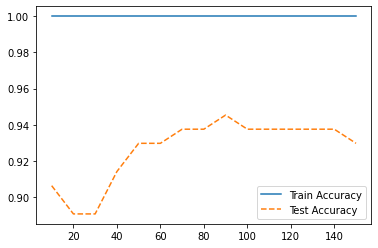

In [160]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle='--', label="Test Accuracy")
plt.legend()

## train과 test 데이터의 성능 변화를 고려해 n_estimators를 90으로 설정한다.

In [161]:
#1. 모델 생성(3) - max_depth 조정

train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234,\
            n_estimators=90, max_depth=v_max_depth)
    rf.fit(x_resampled, y_resampled)
    train_score.append(rf.score(x_resampled, y_resampled))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth']= para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

#모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.943,0.906
1,2,0.974,0.914
2,3,0.996,0.922
3,4,1.000,0.938
4,5,1.000,0.938
5,6,1.000,0.945
6,7,1.000,0.945
7,8,1.000,0.945
8,9,1.000,0.945
9,10,1.000,0.945


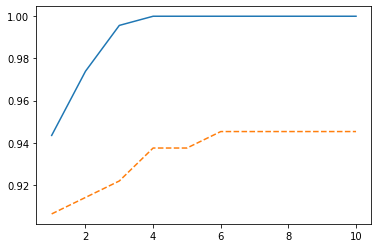

In [162]:
plt.plot(para_depth, train_score, linestyle='-', label='Train score')
plt.plot(para_depth, test_score, linestyle='--', label='Test score')

## train과 test 데이터의 성능 변화를 고려해 depth를 6으로 설정한다.

In [163]:
#1. 모델 생성(4) - min_samples_split 조정

train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234,\
            n_estimators=90, max_depth=6, min_samples_split=v_min_samples_split)
    rf.fit(x_resampled, y_resampled)
    train_score.append(rf.score(x_resampled, y_resampled))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

#모델 설명력 확인
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,1.000,0.945
1,6,1.000,0.938
2,8,1.000,0.930
3,10,1.000,0.938
4,12,0.996,0.922
5,14,0.991,0.922
6,16,0.983,0.922
7,18,0.983,0.922
8,20,0.983,0.914
9,22,0.983,0.914


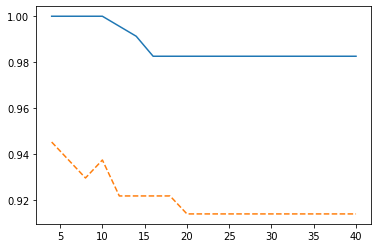

In [164]:
plt.plot(para_split, train_score, linestyle='-', label='Train score')
plt.plot(para_split, test_score, linestyle='--', label='Test score')

## train_score와 test_score의 값을 서로 고려하며 분리 노드의 최소 자료 수를 10로 지정한다.

In [165]:
#1. 모델 생성(5) - min_samples_leaf 조정

train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state=1234,\
            n_estimators=90, max_depth=6, min_samples_split=10, min_samples_leaf=v_min_samples_leaf)
    rf.fit(x_resampled, y_resampled)
    train_score.append(rf.score(x_resampled, y_resampled))
    test_score.append(rf.score(df_test_x, df_test_y))
    
#결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.938
1,2,0.991,0.930
2,3,0.987,0.938
3,4,0.983,0.930
4,5,0.978,0.922
5,6,0.974,0.922
6,7,0.974,0.922
7,8,0.974,0.922
8,9,0.974,0.922
9,10,0.974,0.922


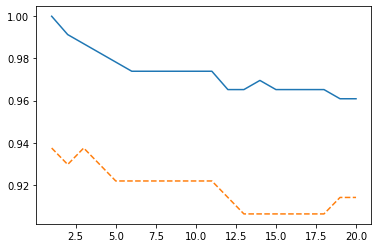

In [166]:
plt.plot(para_leaf, train_score, linestyle='-', label='Train score')
plt.plot(para_leaf, test_score, linestyle='--', label='Test score')

## train_score와 test_score의 값을 서로 고려하며 리프 노드의 최소 자료 수를 3으로 지정한다.

In [167]:
#2. 최종 모델 선정
rf_final = RandomForestClassifier(random_state=1234,\
        n_estimators=90, max_depth=6, min_samples_split=10, min_samples_leaf=3)
rf_final.fit(x_resampled, y_resampled)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=90, random_state=1234)

In [168]:
#3. 최종 모델 평가
y_pred = rf_final.predict(df_test_x)
print("Accuracy: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.938
Confusion Matrix: 
[[93  4]
 [ 4 27]]
              precision    recall  f1-score   support

           0      0.959     0.959     0.959        97
           1      0.871     0.871     0.871        31

    accuracy                          0.938       128
   macro avg      0.915     0.915     0.915       128
weighted avg      0.938     0.938     0.938       128



## 결론: 랜덤 포레스트 모델의 accuracy는 약 93.8이다. precision과 f1-score의 값의 큰 차이는 없다. 앞선 결정경계트리보다 diagnosis가 양성인 경우 f1-score가 좀 더 1에 가깝기에 조금 향상된 성능을 보인다. 따라서 유방암 데이터에서의 모델 정확도는 랜덤 포레스트가 결정경계 트리 모델보다 더 낫다는 것을 알 수 있었다.